In [56]:
import pandas as pd
import tensorflow as tf
from  tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
df = pd.read_csv(r'C:\Users\thesh\OneDrive\Computer\AI\Deeplearning_codebasic\Data\WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [68]:
df.drop('customerID',axis = 'columns',inplace=True)

In [69]:
df1=df[df.TotalCharges!=' ']

In [70]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\thesh\AppData\Local\Temp\ipykernel_10316\973151263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [71]:
def print_unique_col_values(df):
    for column in df:
        if df.dtypes[column]=='object':
            print(f'{column}:{df[column].unique()}')

In [76]:
print_unique_col_values(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [77]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

C:\Users\thesh\AppData\Local\Temp\ipykernel_10316\2045096646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
C:\Users\thesh\AppData\Local\Temp\ipykernel_10316\2045096646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [78]:
print_unique_col_values(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


#### Convert Yes and No to 1 and 0

In [79]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for i in yes_no_columns:
    df1[i].replace({'Yes':1,'No':0},inplace=True)

C:\Users\thesh\AppData\Local\Temp\ipykernel_10316\791664591.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[i].replace({'Yes':1,'No':0},inplace=True)


In [80]:
for col in df1:
    print(f'{col}:{df1[col].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [81]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

C:\Users\thesh\AppData\Local\Temp\ipykernel_10316\698335744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)


In [86]:
df2 = pd.get_dummies(data = df1,columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [95]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [97]:
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])

In [99]:
X = df2.drop('Churn',axis= 'columns')
y = df2.Churn

In [100]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=5)

#### Neural network

In [103]:
model = keras.Sequential([
    keras.layers.Dense(20,input_shape = (26,),activation = 'relu'),
    keras.layers.Dense(1,activation = 'sigmoid')
])
model.compile(optimizer ='adam',loss = 'binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 3s 5ms/step - loss: 0.4978 - accuracy: 0.7492
Epoch 2/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4271 - accuracy: 0.7979
Epoch 3/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4197 - accuracy: 0.8034
Epoch 4/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4168 - accuracy: 0.8025
Epoch 5/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4146 - accuracy: 0.8046
Epoch 6/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4132 - accuracy: 0.8048
Epoch 7/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4120 - accuracy: 0.8048
Epoch 8/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4112 - accuracy: 0.8034
Epoch 9/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4108 - accuracy: 0.8052
Epoch 10/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4105 - accura

176/176 [==============================] - 1s 7ms/step - loss: 0.3836 - accuracy: 0.8226
Epoch 82/100
176/176 [==============================] - 1s 6ms/step - loss: 0.3836 - accuracy: 0.8229
Epoch 83/100
176/176 [==============================] - 1s 6ms/step - loss: 0.3835 - accuracy: 0.8194
Epoch 84/100
176/176 [==============================] - 1s 6ms/step - loss: 0.3835 - accuracy: 0.8196
Epoch 85/100
176/176 [==============================] - 1s 6ms/step - loss: 0.3832 - accuracy: 0.8220
Epoch 86/100
176/176 [==============================] - 1s 6ms/step - loss: 0.3832 - accuracy: 0.8228
Epoch 87/100
176/176 [==============================] - 1s 6ms/step - loss: 0.3834 - accuracy: 0.8203
Epoch 88/100
176/176 [==============================] - 1s 6ms/step - loss: 0.3831 - accuracy: 0.8210
Epoch 89/100
176/176 [==============================] - 1s 6ms/step - loss: 0.3828 - accuracy: 0.8197
Epoch 90/100
176/176 [==============================] - 1s 6ms/step - loss: 0.3823 - accuracy: 

In [104]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 5ms/step - loss: 0.4538 - accuracy: 0.7747


[0.4537617564201355, 0.7746979594230652]

In [105]:
yp =model.predict(X_test)

44/44 [==============================] - 0s 3ms/step


In [107]:
y_pred = []
for element in yp:
    if element >.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [110]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.82      0.87      0.85       999
           1       0.63      0.55      0.58       408

    accuracy                           0.77      1407
   macro avg       0.73      0.71      0.71      1407
weighted avg       0.77      0.77      0.77      1407



Text(95.72222222222221, 0.5, 'Truth')

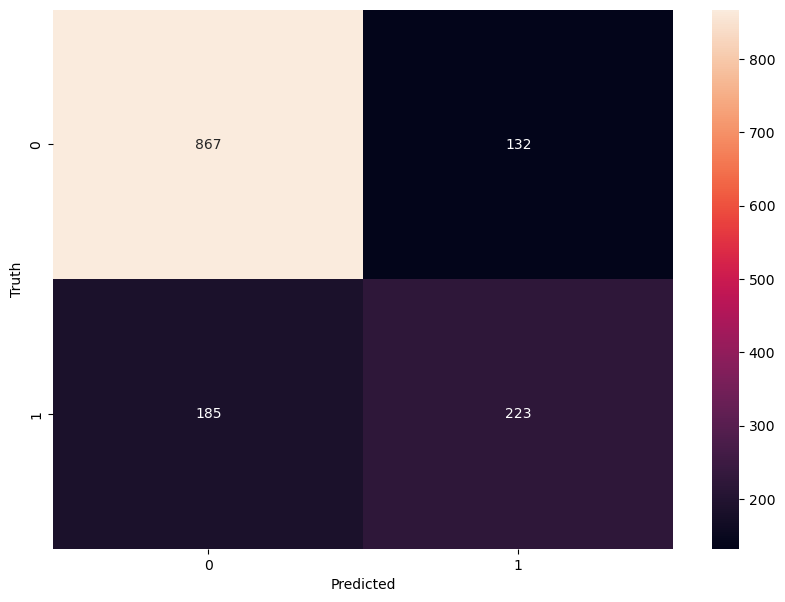

In [111]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')